In [36]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [37]:
dataframe = pd.read_csv('sc1015 mini project(4)(2).csv', index_col=0)

## K Nearest Neighbour

In [380]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [381]:
from sklearn.model_selection import cross_val_score

neighbours=[]
cv_scores=[]

for k in range (1,51,2):
    neighbours.append(k)
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[0.625      0.625      0.625      0.66666667 0.66666667 0.70833333
 0.625      0.625      0.625      0.625     ]


The optimal number of K neighbours = 7 


<function matplotlib.pyplot.show(close=None, block=None)>

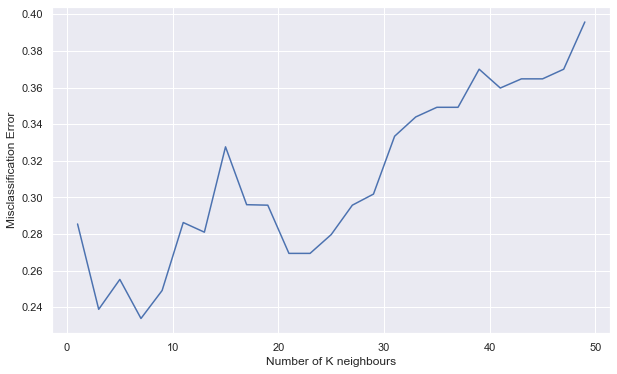

In [382]:
MSE=[1-x for x in cv_scores]

optimal_k=neighbours[MSE.index(min(MSE))]
print('The optimal number of K neighbours = %d '%optimal_k)

plt.figure(figsize=(10,6))
plt.plot(neighbours,MSE)
plt.xlabel('Number of K neighbours')
plt.ylabel('Misclassification Error')
plt.show

In [383]:
model=KNeighborsClassifier(n_neighbors=13)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report
print("Classification Report:\n\n")
print(classification_report(y_test,y_pred))

Classification Report:


              precision    recall  f1-score   support

        down       0.85      0.55      0.67        20
          up       0.74      0.93      0.83        28

    accuracy                           0.77        48
   macro avg       0.79      0.74      0.75        48
weighted avg       0.79      0.77      0.76        48



In [384]:
y_pred_train = model.predict(X_train)
y_pred_train

array(['down', 'down', 'up', 'down', 'down', 'down', 'up', 'up', 'up',
       'up', 'down', 'up', 'up', 'up', 'down', 'up', 'down', 'up', 'up',
       'up', 'down', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'down',
       'down', 'down', 'up', 'up', 'up', 'up', 'up', 'down', 'up', 'down',
       'up', 'down', 'down', 'up', 'up', 'down', 'up', 'up', 'down',
       'down', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up',
       'down', 'up', 'up', 'up', 'up', 'down', 'up', 'down', 'down', 'up',
       'up', 'down', 'up', 'up', 'down', 'down', 'up', 'up', 'down', 'up',
       'up', 'down', 'down', 'down', 'down', 'up', 'up', 'down', 'up',
       'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up',
       'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'down', 'up',
       'down', 'up', 'up', 'up', 'down', 'up', 'down', 'up', 'up', 'up',
       'up', 'up', 'down', 'up', 'up', 'up', 'up', 'up', 'down', 'up',
       'down', 'down', 'down', 'up', 'up', 'up', 'up', 'dow

In [385]:
from sklearn.metrics import accuracy_score
print("Accuracy of stock prediction using KNN =", accuracy_score(y_pred,y_test)*100)


Accuracy of stock prediction using KNN = 77.08333333333334


Text(89.18, 0.5, 'Predicted Class')

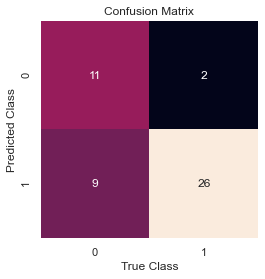

In [386]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,y_pred)
sb.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [387]:
df_microsoft=dataframe.iloc[:24,:]
df_spy=dataframe.iloc[24:48:]
df_google=dataframe.iloc[48:72:]
df_adobe=dataframe.iloc[72:96:]
df_nike=dataframe.iloc[96:120:]
df_tesla=dataframe.iloc[120:144:]
df_facebook=dataframe.iloc[144:168:]
df_dell=dataframe.iloc[168:192:]
df_hp=dataframe.iloc[192:216:]
df_amazon=dataframe.iloc[216:240:]



df_microsoft



,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,190.699997,152.000000,170.429993,162.009995,887522300,158.651062,2020-02-01,MSFT,430527,4.4,101.0,2.4,2.4,-8.419998,down
1,175.000000,132.520004,165.309998,157.710007,1612695500,154.862045,2020-03-01,MSFT,377210,14.7,89.1,2.2,2.2,-7.599991,down
2,180.399994,150.360001,153.000000,179.210007,984705000,175.973785,2020-04-01,MSFT,462286,13.2,71.8,2.1,2.1,26.210007,up
3,187.509995,173.800003,175.800003,183.250000,688845000,179.940842,2020-05-01,MSFT,481205,11.0,72.3,3.2,3.2,7.449997,up
4,204.399994,181.350006,182.539993,203.509995,764965400,200.391510,2020-06-01,MSFT,494905,10.2,78.1,3.0,3.0,20.970001,up
5,216.380005,197.509995,203.139999,205.009995,770190800,201.868546,2020-07-01,MSFT,488949,8.4,72.5,3.0,3.0,1.869995,up
6,231.149994,203.139999,211.520004,225.529999,692423900,222.074112,2020-08-01,MSFT,476247,7.9,74.1,3.1,3.1,14.009995,up
7,232.860001,196.250000,225.509995,210.330002,768176300,207.607681,2020-09-01,MSFT,495722,6.9,80.4,2.6,2.6,-15.179993,down
8,225.210007,199.619995,213.490005,202.470001,631618000,199.849426,2020-10-01,MSFT,492362,6.7,81.8,2.6,2.6,-11.020004,down
9,228.119995,200.119995,204.289993,214.070007,573443000,211.299286,2020-11-01,MSFT,559932,6.7,76.9,2.8,2.8,9.780014,up


In [388]:
df_facebook

,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,218.770004,181.820007,203.440002,192.470001,317547300,192.470001,2020-02-01,FB,430527,4.4,101.0,2.4,2.4,-10.970001,down
1,197.240005,137.100006,194.029999,166.800003,649467700,166.800003,2020-03-01,FB,377210,14.7,89.1,2.2,2.2,-27.229996,down
2,209.690002,150.830002,161.619995,204.710007,541334600,204.710007,2020-04-01,FB,462286,13.2,71.8,2.1,2.1,43.090012,up
3,240.899994,198.759995,201.600006,225.089996,509476500,225.089996,2020-05-01,FB,481205,11.0,72.3,3.2,3.2,23.489990,up
4,245.190002,207.110001,224.589996,227.070007,548043800,227.070007,2020-06-01,FB,494905,10.2,78.1,3.0,3.0,2.480011,up
5,255.850006,226.899994,228.500000,253.669998,517599700,253.669998,2020-07-01,FB,488949,8.4,72.5,3.0,3.0,25.169998,up
6,304.670013,247.429993,252.649994,293.200012,574239100,293.200012,2020-08-01,FB,476247,7.9,74.1,3.1,3.1,40.550018,up
7,303.600006,244.130005,294.709991,261.899994,499115300,261.899994,2020-09-01,FB,495722,6.9,80.4,2.6,2.6,-32.809998,down
8,285.239990,254.820007,265.350006,263.109985,454101600,263.109985,2020-10-01,FB,492362,6.7,81.8,2.6,2.6,-2.240021,down
9,297.380005,257.339996,264.600006,276.970001,356771600,276.970001,2020-11-01,FB,559932,6.7,76.9,2.8,2.8,12.369995,up


In [389]:
df_tesla

,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,193.798004,122.304001,134.738007,133.598007,2362934000,133.598007,2020-02-01,TSLA,430527,4.4,101.0,2.4,2.4,-1.139999,down
1,161.395996,70.101997,142.251999,104.800003,2104675000,104.800003,2020-03-01,TSLA,377210,14.7,89.1,2.2,2.2,-37.451996,down
2,173.964005,89.279999,100.800003,156.376007,1907387500,156.376007,2020-04-01,TSLA,462286,13.2,71.8,2.1,2.1,55.576004,up
3,168.658005,136.608002,151.000000,167.000000,1363518000,167.000000,2020-05-01,TSLA,481205,11.0,72.3,3.2,3.2,16.000000,up
4,217.537994,170.820007,171.600006,215.962006,1278863500,215.962006,2020-06-01,TSLA,494905,10.2,78.1,3.0,3.0,44.362000,up
5,358.997986,216.100006,216.600006,286.152008,1893167500,286.152008,2020-07-01,TSLA,488949,8.4,72.5,3.0,3.0,69.552002,up
6,500.140015,273.000000,289.839996,498.320007,1557378400,498.320007,2020-08-01,TSLA,476247,7.9,74.1,3.1,3.1,208.480011,up
7,502.489990,329.880005,502.140015,429.010010,1736284800,429.010010,2020-09-01,TSLA,495722,6.9,80.4,2.6,2.6,-73.130005,down
8,465.899994,379.109985,440.760010,388.040009,833666400,388.040009,2020-10-01,TSLA,492362,6.7,81.8,2.6,2.6,-52.720001,down
9,607.799988,392.299988,394.000000,567.599976,782598800,567.599976,2020-11-01,TSLA,559932,6.7,76.9,2.8,2.8,173.599976,up


In [390]:
df_dell

,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,27.161682,19.868221,24.728840,20.506842,133433989,20.364193,2020-02-01,DELL,430527,4.4,101.0,2.4,2.4,-4.221998,down
1,22.154079,12.929549,20.638620,20.045616,187864129,19.906176,2020-03-01,DELL,377210,14.7,89.1,2.2,2.2,-0.593004,down
2,22.133806,18.008108,19.133301,21.637100,106696288,21.486589,2020-04-01,DELL,462286,13.2,71.8,2.1,2.1,2.503799,up
3,25.342119,19.660416,21.079575,25.159655,97446076,24.984640,2020-05-01,DELL,481205,11.0,72.3,3.2,3.2,4.080080,up
4,27.992905,23.122149,24.956919,27.845921,155379472,27.652220,2020-06-01,DELL,494905,10.2,78.1,3.0,3.0,2.889002,up
5,31.875317,25.889507,27.906740,30.324379,137813657,30.113438,2020-07-01,DELL,488949,8.4,72.5,3.0,3.0,2.417639,up
6,34.272682,30.060822,30.364927,33.492146,85312720,33.259171,2020-08-01,DELL,476247,7.9,74.1,3.1,3.1,3.127218,up
7,34.911304,31.784084,33.664471,34.308159,101118026,34.069508,2020-09-01,DELL,495722,6.9,80.4,2.6,2.6,0.643688,up
8,36.213886,29.842878,34.556515,30.542320,64984110,30.329863,2020-10-01,DELL,492362,6.7,81.8,2.6,2.6,-4.014194,down
9,35.732388,30.440952,31.013685,34.987328,65261512,34.743950,2020-11-01,DELL,559932,6.7,76.9,2.8,2.8,3.973642,up


In [391]:
df_hp

,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,23.930000,20.170000,21.400000,20.790001,285928100,19.391254,2020-02-01,HPQ,430527,4.4,101.0,2.4,2.4,-0.609999,down
1,21.879999,12.540000,20.900000,17.360001,334132000,16.192020,2020-03-01,HPQ,377210,14.7,89.1,2.2,2.2,-3.539999,down
2,16.670000,14.210000,16.250000,15.510000,315594700,14.602037,2020-04-01,HPQ,462286,13.2,71.8,2.1,2.1,-0.740000,down
3,17.540001,13.390000,15.110000,15.140000,294617300,14.253697,2020-05-01,HPQ,481205,11.0,72.3,3.2,3.2,0.030001,up
4,18.330000,14.950000,15.050000,17.430000,395150300,16.409639,2020-06-01,HPQ,494905,10.2,78.1,3.0,3.0,2.380000,up
5,18.360001,16.020000,17.410000,17.580000,258192500,16.712742,2020-07-01,HPQ,488949,8.4,72.5,3.0,3.0,0.170000,up
6,20.180000,17.379999,17.590000,19.549999,210274700,18.585558,2020-08-01,HPQ,476247,7.9,74.1,3.1,3.1,1.959999,up
7,20.049999,17.830000,19.530001,18.990000,233456200,18.053183,2020-09-01,HPQ,495722,6.9,80.4,2.6,2.6,-0.540001,down
8,19.969999,17.250000,19.100000,17.959999,183285500,17.231707,2020-10-01,HPQ,492362,6.7,81.8,2.6,2.6,-1.140001,down
9,23.350000,18.020000,18.180000,21.930000,200335400,21.040722,2020-11-01,HPQ,559932,6.7,76.9,2.8,2.8,3.750000,up


In [392]:
df_amazon

,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,2185.949951,1811.130005,2010.599976,1883.750000,92510100,1883.750000,2020-02-01,AMZN,430527,4.4,101.0,2.4,2.4,-126.849976,down
1,1996.329956,1626.030029,1906.489990,1949.719971,163809100,1949.719971,2020-03-01,AMZN,377210,14.7,89.1,2.2,2.2,43.229980,up
2,2475.000000,1889.150024,1932.969971,2474.000000,124609800,2474.000000,2020-04-01,AMZN,462286,13.2,71.8,2.1,2.1,541.030029,up
3,2525.449951,2256.379883,2336.800049,2442.370117,82584400,2442.370117,2020-05-01,AMZN,481205,11.0,72.3,3.2,3.2,105.570068,up
4,2796.000000,2437.129883,2448.000000,2758.820068,87818300,2758.820068,2020-06-01,AMZN,494905,10.2,78.1,3.0,3.0,310.820068,up
5,3344.290039,2754.000000,2757.989990,3164.679932,127502000,3164.679932,2020-07-01,AMZN,488949,8.4,72.5,3.0,3.0,406.689941,up
6,3495.000000,3073.000000,3180.510010,3450.959961,83516600,3450.959961,2020-08-01,AMZN,476247,7.9,74.1,3.1,3.1,270.449951,up
7,3552.250000,2871.000000,3489.580078,3148.729980,115899300,3148.729980,2020-09-01,AMZN,495722,6.9,80.4,2.6,2.6,-340.850098,down
8,3496.239990,3019.000000,3208.000000,3036.149902,116226100,3036.149902,2020-10-01,AMZN,492362,6.7,81.8,2.6,2.6,-171.850098,down
9,3366.800049,2950.120117,3061.739990,3168.040039,90810500,3168.040039,2020-11-01,AMZN,559932,6.7,76.9,2.8,2.8,106.300049,up


In [393]:
df_spy


,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,339.079987,285.540009,323.350006,296.260010,2110214900,286.114319,2020-02-01,SPY,430527,4.4,101.0,2.4,2.4,-27.089996,down
1,313.839996,218.259995,298.209991,257.750000,5926017600,248.923126,2020-03-01,SPY,377210,14.7,89.1,2.2,2.2,-40.459991,down
2,294.880005,243.899994,247.979996,290.480011,2819312300,282.181885,2020-04-01,SPY,462286,13.2,71.8,2.1,2.1,42.500015,up
3,306.839996,272.989990,285.309998,304.320007,1910460500,295.626434,2020-05-01,SPY,481205,11.0,72.3,3.2,3.2,19.010010,up
4,323.410004,296.739990,303.619995,308.359985,2358674500,299.551025,2020-06-01,SPY,494905,10.2,78.1,3.0,3.0,4.739990,up
5,327.230011,309.070007,309.570007,326.519989,1505145300,318.588104,2020-07-01,SPY,488949,8.4,72.5,3.0,3.0,16.949982,up
6,351.299988,327.730011,328.320007,349.309998,1045563300,340.824463,2020-08-01,SPY,476247,7.9,74.1,3.1,3.1,20.989990,up
7,358.750000,319.799988,350.209991,334.890015,1814712700,326.754852,2020-09-01,SPY,495722,6.9,80.4,2.6,2.6,-15.319977,down
8,354.019989,322.600006,337.690002,326.540009,1629016100,319.883026,2020-10-01,SPY,492362,6.7,81.8,2.6,2.6,-11.149994,down
9,364.380005,327.239990,330.200012,362.059998,1535244300,354.678894,2020-11-01,SPY,559932,6.7,76.9,2.8,2.8,31.859985,up


In [394]:
df_google


,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,1532.105957,1271.000000,1462.000000,1339.329956,37080600,1339.329956,2020-02-01,GOOG,430527,4.4,101.0,2.4,2.4,-122.670044,down
1,1410.150024,1013.536011,1351.609985,1162.810059,71392100,1162.810059,2020-03-01,GOOG,377210,14.7,89.1,2.2,2.2,-188.799927,down
2,1359.989990,1079.810059,1122.000000,1348.660034,46335100,1348.660034,2020-04-01,GOOG,462286,13.2,71.8,2.1,2.1,226.660034,up
3,1441.000000,1299.000000,1328.500000,1428.920044,31866300,1428.920044,2020-05-01,GOOG,481205,11.0,72.3,3.2,3.2,100.420044,up
4,1475.941040,1347.010010,1418.390015,1413.609985,38828400,1413.609985,2020-06-01,GOOG,494905,10.2,78.1,3.0,3.0,-4.780029,down
5,1586.989990,1409.819946,1411.099976,1482.959961,35247000,1482.959961,2020-07-01,GOOG,488949,8.4,72.5,3.0,3.0,71.859985,up
6,1659.219971,1458.650024,1486.640015,1634.180054,37830900,1634.180054,2020-08-01,GOOG,476247,7.9,74.1,3.1,3.1,147.540039,up
7,1733.180054,1406.550049,1636.630005,1469.599976,40567600,1469.599976,2020-09-01,GOOG,495722,6.9,80.4,2.6,2.6,-167.030029,down
8,1687.000000,1436.000000,1484.270020,1621.010010,39254200,1621.010010,2020-10-01,GOOG,492362,6.7,81.8,2.6,2.6,136.739990,up
9,1818.060059,1616.030029,1628.160034,1760.739990,35035400,1760.739990,2020-11-01,GOOG,559932,6.7,76.9,2.8,2.8,132.579956,up


In [395]:
df_adobe


,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,386.750000,324.000000,353.410004,345.119995,56911700,345.119995,2020-02-01,ADBE,430527,4.4,101.0,2.4,2.4,-8.290009,down
1,364.950012,255.130005,349.809998,318.239990,126565500,318.239990,2020-03-01,ADBE,377210,14.7,89.1,2.2,2.2,-31.570007,down
2,356.230011,289.709991,307.000000,353.640015,73060300,353.640015,2020-04-01,ADBE,462286,13.2,71.8,2.1,2.1,46.640015,up
3,391.269989,340.000000,347.239990,386.600006,55496700,386.600006,2020-05-01,ADBE,481205,11.0,72.3,3.2,3.2,39.360016,up
4,446.149994,382.000000,387.079987,435.309998,70630600,435.309998,2020-06-01,ADBE,494905,10.2,78.1,3.0,3.0,48.230011,up
5,470.609985,416.290009,434.799988,444.320007,54648000,444.320007,2020-07-01,ADBE,488949,8.4,72.5,3.0,3.0,9.520020,up
6,533.700012,431.589996,449.839996,513.390015,54518500,513.390015,2020-08-01,ADBE,476247,7.9,74.1,3.1,3.1,63.550018,up
7,536.880005,452.519989,515.000000,490.429993,84762100,490.429993,2020-09-01,ADBE,495722,6.9,80.4,2.6,2.6,-24.570007,down
8,519.599976,442.510010,497.429993,447.100006,48077600,447.100006,2020-10-01,ADBE,492362,6.7,81.8,2.6,2.6,-50.329987,down
9,502.529999,438.940002,451.000000,478.470001,53547100,478.470001,2020-11-01,ADBE,559932,6.7,76.9,2.8,2.8,27.470001,up


In [396]:
df_nike

,high,low,open,close,volume,adjclose,formatted_date,name,RetailSales,unemployment,csentiment,inflationexp,federalfunds,change,change_class
0,103.889999,85.150002,99.000000,89.379997,138959900,87.675415,2020-02-01,NKE,430527,4.4,101.0,2.4,2.4,-9.620003,down
1,94.980003,60.000000,89.599998,82.739998,344640300,81.387230,2020-03-01,NKE,377210,14.7,89.1,2.2,2.2,-6.860001,down
2,91.389999,77.160004,79.489998,87.180000,165095600,85.754646,2020-04-01,NKE,462286,13.2,71.8,2.1,2.1,7.690002,up
3,100.690002,84.110001,85.669998,98.580002,135741000,96.968254,2020-05-01,NKE,481205,11.0,72.3,3.2,3.2,12.910004,up
4,104.690002,93.440002,98.400002,98.050003,183209200,96.687508,2020-06-01,NKE,494905,10.2,78.1,3.0,3.0,-0.349998,down
5,100.180000,95.110001,98.500000,97.610001,114801300,96.253632,2020-07-01,NKE,488949,8.4,72.5,3.0,3.0,-0.889999,down
6,112.790001,96.550003,98.029999,111.889999,115986600,110.335182,2020-08-01,NKE,476247,7.9,74.1,3.1,3.1,13.860001,up
7,130.380005,110.209999,112.000000,125.540001,193213000,124.069756,2020-09-01,NKE,495722,6.9,80.4,2.6,2.6,13.540001,up
8,131.380005,118.800003,127.730003,120.080002,113428500,118.673698,2020-10-01,NKE,492362,6.7,81.8,2.6,2.6,-7.650002,down
9,136.350006,121.099998,122.370003,134.699997,109138400,133.122467,2020-11-01,NKE,559932,6.7,76.9,2.8,2.8,12.329994,up
